In [ ]:
[로지스틱 회귀]

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

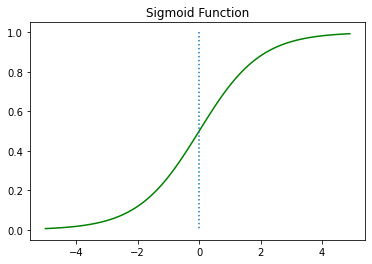

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

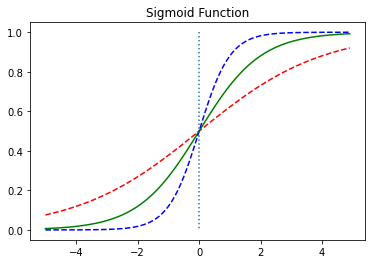

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle = '--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle = '--')
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

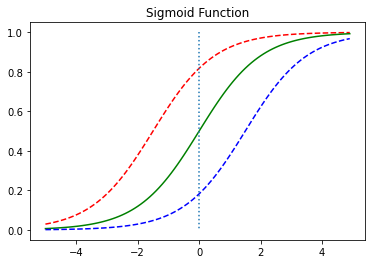

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+1.5)
y2 = sigmoid(x)
y3 = sigmoid(x-1.5)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0],[1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [14]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [22]:
W = torch.zeros((2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [23]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [24]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)


In [25]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [26]:
losses = -(y_train*torch.log(hypothesis) + (1 - y_train)*torch.log(1 - hypothesis))

print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [27]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [28]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

In [30]:
optimizer = optim.SGD([W, b], lr = 1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = F.binary_cross_entropy(hypothesis, y_train).mean()
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [31]:
print(hypothesis)

tensor([[2.7711e-04],
        [3.1636e-02],
        [3.9014e-02],
        [9.5618e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)


In [32]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [33]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


In [ ]:
[nn.Module로 구현하는 로지스틱 회귀]

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [8]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [10]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

In [11]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward>)

In [13]:
optimizer = optim.SGD(model.parameters(), lr = 1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    hypothesis = model(x_train)
    
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.527002 Accuracy 83.33%
Epoch   10/1000 Cost: 0.994597 Accuracy 66.67%
Epoch   20/1000 Cost: 0.570399 Accuracy 83.33%
Epoch   30/1000 Cost: 0.473909 Accuracy 83.33%
Epoch   40/1000 Cost: 0.388606 Accuracy 83.33%
Epoch   50/1000 Cost: 0.307901 Accuracy 83.33%
Epoch   60/1000 Cost: 0.235923 Accuracy 83.33%
Epoch   70/1000 Cost: 0.182916 Accuracy 100.00%
Epoch   80/1000 Cost: 0.155795 Accuracy 100.00%
Epoch   90/1000 Cost: 0.143031 Accuracy 100.00%
Epoch  100/1000 Cost: 0.133369 Accuracy 100.00%
Epoch  110/1000 Cost: 0.124978 Accuracy 100.00%
Epoch  120/1000 Cost: 0.117600 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111060 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105223 Accuracy 100.00%
Epoch  150/1000 Cost: 0.099983 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095251 Accuracy 100.00%
Epoch  170/1000 Cost: 0.090958 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087044 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083461 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080169 Accuracy 100.00%

In [14]:
model(x_train)

tensor([[2.7553e-04],
        [3.1567e-02],
        [3.8923e-02],
        [9.5627e-01],
        [9.9824e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)

In [15]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2543, 1.5186]], requires_grad=True), Parameter containing:
tensor([-14.4881], requires_grad=True)]


In [ ]:
[클래스로 파이토치 모델 구현하기]

In [16]:
class BinaryClassifier(nn.Module):
    def __init(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        return self.sigmoid(self.linear(x))